In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
events = pd.read_csv('../resources/trajectories-0400pm-0415pm_editted.csv')

In [3]:
events.head()

,Vehicle_ID,Frame_ID,Tot_Frames,Epoch_ms,Local_X,Local_Y,Global_X,Global_Y,Veh_Len,Veh_Wid,...,Org_Zone,Dest_Zone,Intersection,Section,Direction,Movement,Preceding_Veh,Following_Veh,Spacing,Headway
0,2,29,1707,1163033200,8.695,235.155,2230541.536,1375765.856,14.0,7.0,...,102,214,1,0,2,3,0,0,0.0,0.0
1,2,30,1707,1163033300,7.957,236.573,2230541.013,1375767.607,14.0,7.0,...,102,214,0,2,2,1,0,0,0.0,0.0
2,2,31,1707,1163033400,7.335,238.296,2230540.384,1375769.177,14.0,7.0,...,102,214,0,2,2,1,0,0,0.0,0.0
3,2,32,1707,1163033500,6.855,240.238,2230540.053,1375771.229,14.0,7.0,...,102,214,0,2,2,1,0,0,0.0,0.0
4,2,33,1707,1163033600,6.543,242.413,2230539.947,1375773.631,14.0,7.0,...,102,214,0,2,2,1,0,0,0.0,0.0


In [4]:
events.shape

(457997, 24)

In [5]:
print("Number of Cars")
events.Vehicle_ID.drop_duplicates().shape[0]

Number of Cars


753

In [6]:
min_time = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime(events.Epoch_ms.min()))
print("Start Time:", min_time)

Start Time: 11/08/2006 19:06:40


In [7]:
max_time = time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime(events.Epoch_ms.max()))
print("End Time:", max_time)

End Time: 11/20/2006 17:53:20


In [9]:
carsOnTheRoad = dict()
min_epoch = events.Epoch_ms.min()
max_epoch = events.Epoch_ms.max()
for timeincr in range(min_epoch, max_epoch, 4000):
    carsOnTheRoad[timeincr] = 0
    records = events[(events.Epoch_ms >= timeincr) & (events.Epoch_ms <= (timeincr+4000)) ]
    carsOnTheRoad[timeincr] = records.Vehicle_ID.drop_duplicates().shape[0]


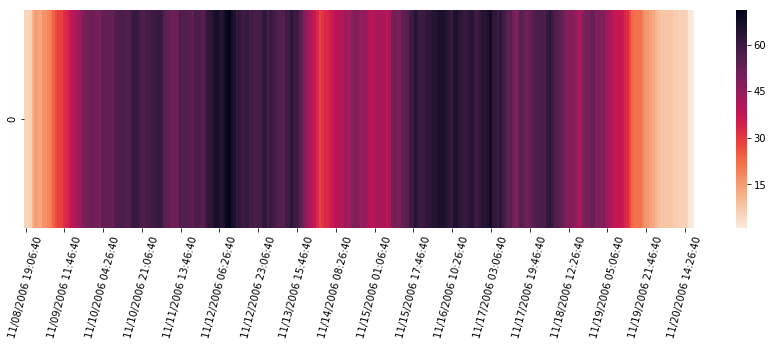

In [10]:
df = pd.DataFrame.from_dict(carsOnTheRoad, orient='index')
df.index = pd.Series({x: time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime(x)) for x in df.index})
import seaborn as sns
plt.figure(figsize=(15, 4))
plt.xticks(rotation=75)
sns.heatmap(df.transpose(), xticklabels = 15, cmap= sns.cm.rocket_r);


<BarContainer object of 259 artists>

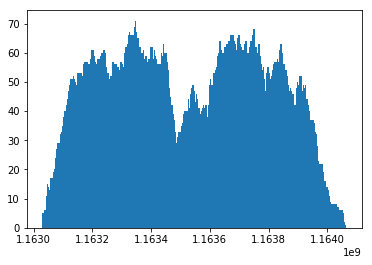

In [11]:
plt.bar(list(carsOnTheRoad.keys()), list(carsOnTheRoad.values()),width=5000 )


In [12]:
events_halfhour = events[(events.Epoch_ms >= 1163412400) & (events.Epoch_ms <= 1163426800) ]

In [187]:
events_halfhour.shape

(7983, 24)

In [91]:
events[events.Vehicle_ID == 21]

,Vehicle_ID,Frame_ID,Tot_Frames,Epoch_ms,Local_X,Local_Y,Global_X,Global_Y,Veh_Len,Veh_Wid,...,Org_Zone,Dest_Zone,Intersection,Section,Direction,Movement,Preceding_Veh,Following_Veh,Spacing,Headway
6884,21,88,209,1163039100,23.705,27.501,2230530.563,1375559.337,18.0,7.0,...,101,202,0,1,2,1,0,0,0.0,0.0
6885,21,89,209,1163039200,23.789,25.503,2230530.485,1375557.339,18.0,7.0,...,101,202,0,1,2,1,0,0,0.0,0.0
6886,21,90,209,1163039300,23.768,26.002,2230530.505,1375557.838,18.0,7.0,...,101,202,0,1,2,1,0,0,0.0,0.0
6887,21,91,209,1163039400,23.641,28.999,2230530.621,1375560.836,18.0,7.0,...,101,202,0,1,2,1,0,0,0.0,0.0
6888,21,92,209,1163039500,23.514,31.997,2230530.737,1375563.834,18.0,7.0,...,101,202,0,1,2,1,0,0,0.0,0.0
6889,21,93,209,1163039600,23.478,34.207,2230530.858,1375566.189,18.0,7.0,...,101,202,0,1,2,1,0,0,0.0,0.0
6890,21,94,209,1163039700,23.494,36.465,2230531.077,1375568.435,18.0,7.0,...,101,202,0,1,2,1,0,0,0.0,0.0
6891,21,95,209,1163039800,23.569,38.472,2230531.347,1375570.420,18.0,7.0,...,101,202,0,1,2,1,0,0,0.0,0.0
6892,21,96,209,1163039900,23.615,40.306,2230531.520,1375572.170,18.0,7.0,...,101,202,0,1,2,1,0,0,0.0,0.0
6893,21,97,209,1163040000,23.590,41.889,2230531.646,1375573.654,18.0,7.0,...,101,202,0,1,2,1,0,0,0.0,0.0


In [67]:
first_events = events.groupby('Vehicle_ID').first().reset_index()
car_remove = []
for index, row in first_events.iterrows() or row.Direction==4:
    if (row.Intersection + row.Section) != 1:
        car_remove.append(int(row.Vehicle_ID))

In [69]:
filtered_events = events[~events.Vehicle_ID.isin(car_remove)]

In [70]:
last_events = filtered_events.groupby('Vehicle_ID').last().reset_index()
car_remove = []
for index, row in last_events.iterrows():
    if (row.Intersection + row.Section) == 1 or row.Direction==4:
        car_remove.append(int(row.Vehicle_ID))

In [72]:
filtered_events = filtered_events[~filtered_events.Vehicle_ID.isin(car_remove)]

In [76]:
len(filtered_events.Vehicle_ID.unique())

152

In [13]:
## Exit section analysis

In [82]:
exit_section = filtered_events.groupby(['Vehicle_ID']).last().reset_index()[['Vehicle_ID', 'Section', 'Intersection']]

In [83]:
exit_section['exit'] = exit_section['Section'] + exit_section['Intersection']

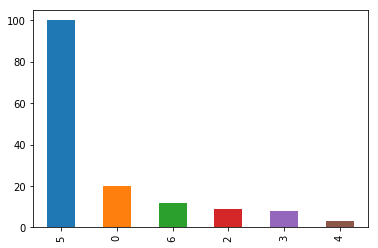

In [88]:
exit_section.exit.value_counts().plot.bar()

In [89]:
exit_section[exit_section.exit == 0]

,Vehicle_ID,Section,Intersection,exit
4,21,0,0,0
5,24,0,0,0
26,224,0,0,0
35,259,0,0,0
39,271,0,0,0
42,335,0,0,0
46,360,0,0,0
53,381,0,0,0
60,451,0,0,0
61,489,0,0,0
